# Credit Card Default Data

El objetivo es predecir que clientes van a fallar en el pago de la tarjeta de credito.  
- **default**: si el cliente a fallado o no ha fallado en el pago de su deuda en el banco  
- **student**: si es o no estudiante  
- **balance**: balance promedio que el cliente ha mantenido en su tarjeta de credito despues del pago mensual  
- **income**: ingreso del cliente  

In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("data.csv")
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [12]:
df = df.drop(['index'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


## Preprocesamiento

In [13]:
columnas_categoricas = ["default", "student"]
data_final = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
data_final

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


## Separar las variables predictoras (x) y la predicha (y)

In [15]:
x = data_final[["student_Yes", "balance", "income"]]
x

,student_Yes,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [16]:
y = data_final[["default_Yes"]]
y

,default_Yes
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


## Separar data de entrenamiento con data de validacion

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
x_train

,student_Yes,balance,income
6906,1,919.475485,6100.733202
9781,0,675.114952,58672.051649
6274,1,728.259292,13438.985556
3513,1,444.025308,23691.983217
8965,0,679.266805,36694.750263
...,...,...,...
4085,0,887.594632,59416.159758
4784,0,952.127530,49137.395688
8870,0,792.974068,28674.670626
5857,0,1178.158858,44437.202139


## Modelamiento

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [25]:
clasificador = LogisticRegression()
clasificador.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = clasificador.predict(x_test)

## Evaluar el modelo

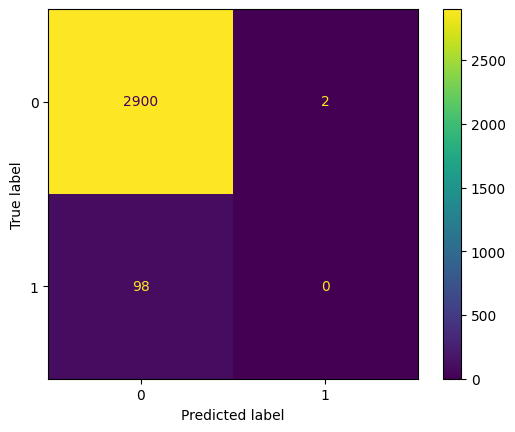

In [27]:
plot_confusion_matrix(clasificador, x_test, y_test)

In [28]:
print("El accuracy de nuestro modelo de regresion es: ", accuracy_score(y_pred, y_test))

El accuracy de nuestro modelo de regresion es:  0.9666666666666667
